In [40]:
import numpy as np 
import pandas as pd 

In [5]:
data=pd.read_csv("train.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
toto=data.groupby('Ticket').Survived.agg(["count","mean"]).sort_values("count",ascending=False)
toto

,count,mean
Ticket,,
1601,7,0.714286
CA. 2343,7,0.000000
347082,7,0.000000
CA 2144,6,0.000000
347088,6,0.000000
...,...,...
345572,1,1.000000
345364,1,0.000000
343276,1,0.000000


In [26]:
data['Familyname'] = data.Name.apply(lambda x : x.split(',')[0])
data['Firstname'] = data.Name.apply(lambda x : x.split(',')[1])

toto = data.groupby('Familyname').Survived.agg(['count', 'mean']).sort_values('count', ascending=False)
toto[(toto['count'] > 1) & (toto['count'] < 10)]

,count,mean
Familyname,,
Andersson,9,0.222222
Sage,7,0.000000
Skoog,6,0.000000
Carter,6,0.666667
Goodwin,6,0.000000
...,...,...
Zabour,2,0.000000
White,2,0.000000
McCoy,2,1.000000


In [27]:
data.groupby("Sex").Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

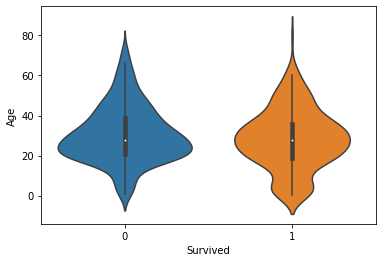

In [28]:
import seaborn as sns
sns.violinplot(x="Survived",y="Age",data=data)

In [31]:
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [32]:
data.groupby("Pclass").Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [39]:
data.corr()[["Age",'Survived']].T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
